In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
 
 def __init__(self, in_features= 4, h1= 8, h2= 9, out_features= 3):
  #how many layers?
  #input Layer (4 features) ---> h1 N ---> h2 N ---> Output Layer (3 classes)
  super().__init__()
  self.fc1= nn.Linear(in_features, h1)
  self.fc2= nn.Linear(h1, h2)
  self.out= nn.Linear(h2, out_features)

 def forward(self, x):
  x = F.relu(self.fc1(x))
  x = F.relu(self.fc2(x))
  x = F.relu(self.out(x))
  
  return x
  

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os

#access the environment variable
path = os.environ.get('PATH')

#read data as pandas dataframe
df= pd.read_csv(path)

#instantiate a seed for reproducibility & the ANN
torch.manual_seed(33)
model= Model()

#create features & target variables 
X= df.drop('target',axis=1).values
y= df['target'].values

#split data into training and test set
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=33)

#convert train & test sets to torch tensors
X_train= torch.FloatTensor(X_train)
X_test= torch.FloatTensor(X_test)

y_train= torch.LongTensor(y_train)
y_test= torch.LongTensor(y_test)


In [8]:
#set function to calculate loss
criterion= nn.CrossEntropyLoss()
#set adam as the optimiser
optimizer= torch.optim.Adam(model.parameters(),lr=0.001)

epochs= 100
losses= []

for epoch in range(epochs):
 
 #forward and get a prediction
 y_pred= model.forward(X_train)
 
 #calculate loss/error
 loss= criterion(y_pred, y_train)
 
 losses.append(loss)
 
 #print out epoch & loss
 if epoch % 10 == 0:
  print(f'Epoch: {epoch} and loss is: {loss}')
  
  #backpropagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  
  

Epoch: 0 and loss is: 1.1880278587341309
Epoch: 10 and loss is: 1.1817314624786377
Epoch: 20 and loss is: 1.17567777633667
Epoch: 30 and loss is: 1.1698613166809082
Epoch: 40 and loss is: 1.1642731428146362
Epoch: 50 and loss is: 1.1589192152023315
Epoch: 60 and loss is: 1.1537964344024658
Epoch: 70 and loss is: 1.1488996744155884
Epoch: 80 and loss is: 1.1442302465438843
Epoch: 90 and loss is: 1.1397795677185059


Text(0.5, 0, 'Epochs')

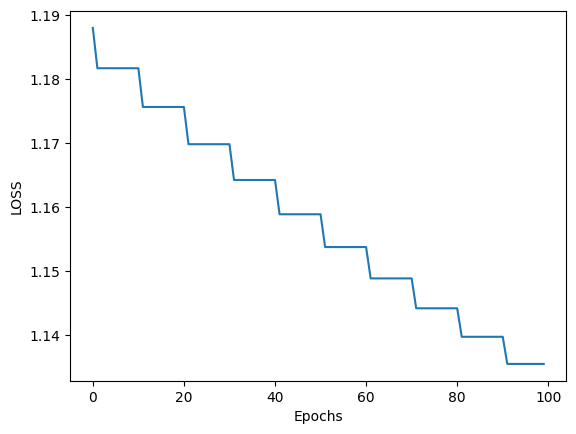

In [9]:
#plot loss
losses=[tensor.detach().numpy() for tensor in losses]
plt.plot(range(epochs),losses)
plt.ylabel('LOSS')
plt.xlabel('Epochs')